In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings(action = 'ignore')

In [5]:
pd.set_option('display.max_columns',35)

In [7]:
ad_dong_df = pd.read_csv("행정동_컬럼추가_최종ver.csv",index_col=0)
ad_dong_df.rename(columns={"인구수" : "MZ_POP_CNT"},inplace=True)
ad_dong_df

,GU,DONG,DONG_CODE,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,SUBWAY_NUM,SAFE_DLVR_NUM,DPTM_NUM,ANI_HSPT_NUM,PHARM_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,HOSPITAL_NUM,BUS_CNT,RETAIL_NUM,COLIVING_NUM,MZ_POP_CNT
0,종로구,청운효자동,1111051500,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,0.333333,1.000000,0.0,2.000000,4.333333,1.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,11.666667,14.0,0.000000,0.0,3210
1,종로구,사직동,1111053000,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,1.333333,0.000000,0.0,1.000000,17.333333,1.000000,0.000000,0.0,18.0,3.000000,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,74.666667,16.0,2.000000,1.0,2749
2,종로구,삼청동,1111054000,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,7.000000,11.0,0.000000,0.0,684
3,종로구,부암동,1111055000,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.0,3.000000,1.000000,0.000000,0.000000,0.0,2.0,2.000000,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,4.000000,9.0,0.000000,0.0,2585
4,종로구,평창동,1111056000,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.0,5.0,5.000000,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,14.000000,37.0,0.000000,0.0,4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,11.0,3.333333,0.0,8130
422,강동구,성내3동,1174066000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,9.0,3.333333,0.0,7120
423,강동구,길동,1174068500,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,1.000000,1.000000,0.0,8.000000,35.000000,3.000000,1.000000,0.0,18.0,9.000000,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,120.000000,28.0,8.000000,0.0,14486
424,강동구,둔촌1동,1174069000,38.000000,0.000000,0.0,2.000000,1.500000,1.0,32.500000,1.000000,5.500000,2.000000,0.500000,0.000000,0.0,1.500000,10.000000,0.000000,0.000000,0.0,4.0,3.000000,0.000000,0.5,17.000000,2163.500000,0.000000,17.500000,1.000000,14.500000,4.0,0.000000,0.0,33


In [29]:
ad_dong_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'RETAIL_NUM', 'COLIVING_NUM', 'MZ_POP_CNT'],
      dtype='object')

In [8]:
tmp_df = ad_dong_df.copy()

In [9]:
# 피쳐합

# 교통
tmp_df['교통'] =tmp_df['SUBWAY_NUM'] + 0.93*tmp_df['BUS_CNT']+0.06*tmp_df['BIKE_NUM']
tmp_df = tmp_df.drop(['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],axis=1)

# 교육
tmp_df['교육'] =(0.07)*tmp_df['MID_SCH_NUM'] + (0.03)*tmp_df['HIGH_SCH_NUM']+tmp_df['ACADEMY_NUM'] + (0.9)*tmp_df['ELE_SCH_NUM']
tmp_df = tmp_df.drop(['MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM','ELE_SCH_NUM'],axis=1)

# 육아
tmp_df['육아'] =  tmp_df['CHILD_MED_NUM']+ tmp_df['KINDER_NUM']
tmp_df = tmp_df.drop(['CHILD_MED_NUM','KINDER_NUM'],axis=1)

# 치안
tmp_df['치안'] = tmp_df['POLICE_NUM']+tmp_df['CCTV_NUM']+tmp_df['FIRE_NUM']
tmp_df = tmp_df.drop(['POLICE_NUM','CCTV_NUM','FIRE_NUM'],axis=1)

# 건강
tmp_df['건강'] =(0.94)*tmp_df['HOSPITAL_NUM'] + tmp_df['PHARM_NUM']
tmp_df = tmp_df.drop(['HOSPITAL_NUM','PHARM_NUM'],axis=1)

# 편의시설
tmp_df['편의시설'] =0.04*tmp_df['DPTM_NUM'] + 0.44 * tmp_df['CON_NUM'] + 0.25 * tmp_df['CAFE_NUM'] + 0.27 * tmp_df['RETAIL_NUM']
tmp_df = tmp_df.drop(['DPTM_NUM','CON_NUM','CAFE_NUM','RETAIL_NUM'],axis=1)

In [10]:
tmp_df.set_index('DONG_CODE',inplace=True)

### 행정동 개수 기반으로 기본 클러스터링

In [11]:

data = tmp_df.drop(['GU','DONG'],axis=1)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(data)

basic_df = tmp_df.copy()
basic_df['km_cluster'] = kmeans.labels_
basic_df.groupby('km_cluster').count()

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설
km_cluster,,,,,,,,,,,,,,,,,,,,,,
0,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274
1,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123


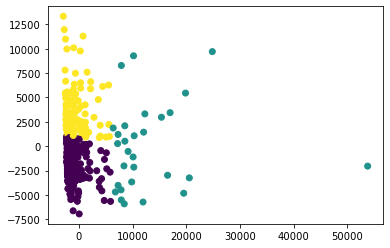

In [12]:
from sklearn.decomposition import PCA

basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(data)

basic_df['pca_x']=basic_pca_transformed[:,0]
basic_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=basic_df.loc[:,'pca_x'], y=basic_df.loc[:,'pca_y'],c=basic_df['km_cluster'])

### 소음 수치 이상
- 카테고리화 또는 스케일링 필요 -> 이상치 제거 해야함

In [13]:
basic_df[50000 < basic_df['pca_x']]

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1111061500,종로구,종로1.2.3.4가동,18.0,0.0,0.0,4.0,1.0,0.0,10.0,5.0,13.333333,1.0,56112.0,1.666667,3.0,2370,50.663333,105.1,70.333333,85.666667,192.66,89.851667,1,53817.879903,-2039.252176


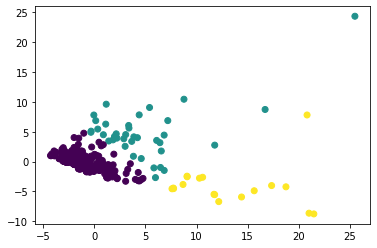

In [15]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

robust_scaler.fit(data)

robust_data = robust_scaler.transform(data)

# density_data = minmax_norm(density_data)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(robust_data)

robust_df = tmp_df.copy()
robust_df['km_cluster'] = kmeans.labels_


basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(robust_data)

robust_df['pca_x']=basic_pca_transformed[:,0]
robust_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=robust_df.loc[:,'pca_x'], y=robust_df.loc[:,'pca_y'],c=robust_df['km_cluster'])

In [17]:
robust_df[25 < robust_df['pca_x']]

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1111061500,종로구,종로1.2.3.4가동,18.0,0.0,0.0,4.0,1.0,0.0,10.0,5.0,13.333333,1.0,56112.0,1.666667,3.0,2370,50.663333,105.1,70.333333,85.666667,192.66,89.851667,1,25.519988,24.346573


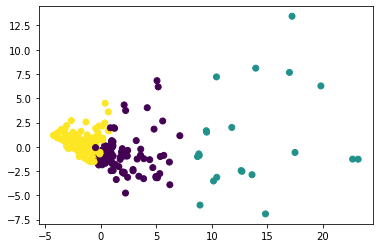

In [18]:
noise_rv_df = tmp_df.copy()
noise_rv_df['NOISE_VIBRATION_NUM'] = np.where(noise_rv_df['NOISE_VIBRATION_NUM'] <500, 4,(np.where(noise_rv_df['NOISE_VIBRATION_NUM']<=1000, 3,(np.where(noise_rv_df['NOISE_VIBRATION_NUM']<=1500,2,1)))))
data = noise_rv_df.drop(['GU','DONG'],axis=1)

robust_scaler = RobustScaler()

robust_scaler.fit(data)

robust_data = robust_scaler.transform(data)

# density_data = minmax_norm(density_data)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(robust_data)

robust_df = noise_rv_df.copy()
robust_df['km_cluster'] = kmeans.labels_


basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(robust_data)

robust_df['pca_x']=basic_pca_transformed[:,0]
robust_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=robust_df.loc[:,'pca_x'], y=robust_df.loc[:,'pca_y'],c=robust_df['km_cluster'])

### 역삼1동, 역삼2동
- 병원이 많은 동네 -> 스케일링 필요.
- 상위 2%를 최대값으로 조정

In [19]:
robust_df[20 < robust_df['pca_x']]

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1168064000,강남구,역삼1동,19.0,1.0,7.5,5.5,1.0,0.0,45.0,32.5,12.0,1.0,1,0.0,3.0,18216,28.73,195.885,37.0,216.0,289.7,135.775,1,23.175666,-1.279070
1168065000,강남구,역삼2동,19.0,1.0,7.5,5.5,1.0,0.0,45.0,32.5,12.0,1.0,1,0.0,0.0,9373,16.64,195.885,37.0,216.0,289.7,135.775,1,22.677351,-1.267936


### 면적으로 나누기
- 동별로 사이즈가 다르기때문에, 절대개수가 아닌 면적당 개수로 변환

In [375]:
density_df = pd.read_excel('인구밀도.xlsx')

In [376]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(ad_dong_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU', 'DONG', 'DONG_CODE', 'AREA', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'RETAIL_NUM', 'COLIVING_NUM', 'MZ_POP_CNT']]


In [377]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [378]:
# 피쳐합
tmp_df = tmp.copy()
# 교통
tmp_df['교통'] =tmp_df['SUBWAY_NUM'] + 0.93*tmp_df['BUS_CNT']+0.06*tmp_df['BIKE_NUM']
tmp_df = tmp_df.drop(['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],axis=1)

# 교육
tmp_df['교육'] =(0.07)*tmp_df['MID_SCH_NUM'] + (0.03)*tmp_df['HIGH_SCH_NUM']+tmp_df['ACADEMY_NUM'] + (0.9)*tmp_df['ELE_SCH_NUM']
tmp_df = tmp_df.drop(['MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM','ELE_SCH_NUM'],axis=1)

# 육아
tmp_df['육아'] =  tmp_df['CHILD_MED_NUM']+ tmp_df['KINDER_NUM']
tmp_df = tmp_df.drop(['CHILD_MED_NUM','KINDER_NUM'],axis=1)

# 치안
tmp_df['치안'] = tmp_df['POLICE_NUM']+tmp_df['CCTV_NUM']+tmp_df['FIRE_NUM']
tmp_df = tmp_df.drop(['POLICE_NUM','CCTV_NUM','FIRE_NUM'],axis=1)

# 건강
tmp_df['건강'] =(0.94)*tmp_df['HOSPITAL_NUM'] + tmp_df['PHARM_NUM']
tmp_df = tmp_df.drop(['HOSPITAL_NUM','PHARM_NUM'],axis=1)

# 편의시설
tmp_df['편의시설'] =0.04*tmp_df['DPTM_NUM'] + 0.44 * tmp_df['CON_NUM'] + 0.25 * tmp_df['CAFE_NUM'] + 0.27 * tmp_df['RETAIL_NUM']
tmp_df = tmp_df.drop(['DPTM_NUM','CON_NUM','CAFE_NUM','RETAIL_NUM'],axis=1)

In [379]:
tmp_df.set_index('DONG_CODE',inplace=True)

In [380]:
tmp_data = tmp_df.iloc[:,3:]
density_data = tmp_data.div(tmp_df['AREA'], axis=0)

In [381]:
density_data['NOISE_VIBRATION_NUM'] = np.where(density_data['NOISE_VIBRATION_NUM'] <500, 4,(np.where(density_data['NOISE_VIBRATION_NUM']<=1000, 3,(np.where(density_data['NOISE_VIBRATION_NUM']<=1500,2,1)))))
density_data['STARBUCKS_NUM'] = np.log1p(density_data['STARBUCKS_NUM'])

In [382]:
health_quan = density_data['건강'].quantile(0.95)

In [383]:
density_data['건강'] =  np.where(density_data['건강'] > health_quan,health_quan,density_data['건강'])
density_data['건강'] = np.log1p(density_data['건강'])

49.46700044121973


<AxesSubplot:>

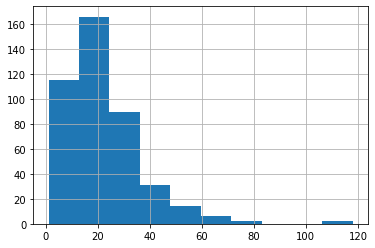

In [384]:
con_quan = density_data['편의시설'].quantile(0.95)
print(con_quan)
density_data['편의시설'].hist()

In [385]:
density_data['편의시설'] =  np.where(density_data['편의시설'] > con_quan,con_quan,density_data['편의시설'])
density_data['편의시설'] = np.log1p(density_data['편의시설'])

148.35303495512517


<AxesSubplot:>

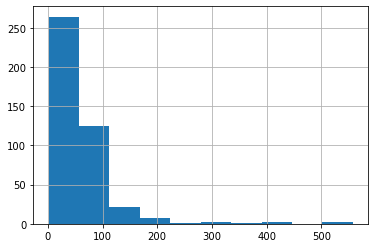

In [386]:
edu_quan = density_data['교육'].quantile(0.95)
print(edu_quan)
density_data['교육'].hist()

In [387]:
density_data['교육'] =  np.where(density_data['교육'] > edu_quan,edu_quan,density_data['교육'])
density_data['교육'] = np.log1p(density_data['교육'])

9.501347708894876


<AxesSubplot:>

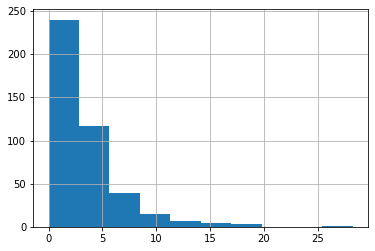

In [388]:
golf_quan = density_data['GOLF_NUM'].quantile(0.95)
print(golf_quan)
density_data['GOLF_NUM'].hist()

In [389]:
density_data['GOLF_NUM'] =  np.where(density_data['GOLF_NUM'] > golf_quan,golf_quan,density_data['GOLF_NUM'])
density_data['GOLF_NUM'] = np.log1p(density_data['GOLF_NUM'])

29.322401908801698


<AxesSubplot:>

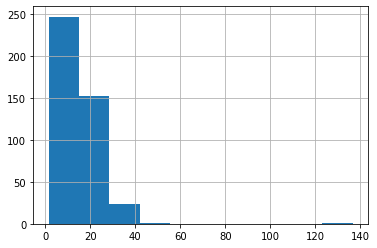

In [390]:
traffic_quan = density_data['교통'].quantile(0.95)
print(traffic_quan)
density_data['교통'].hist()

In [391]:
density_data['교통'] =  np.where(density_data['교통'] > traffic_quan,traffic_quan,density_data['교통'])
density_data['교통'] = np.log1p(density_data['교통'])

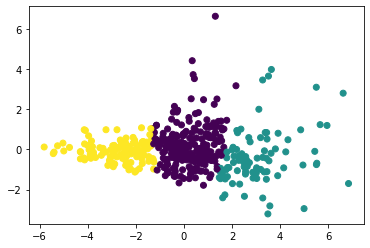

In [392]:

robust_scaler = RobustScaler()

robust_scaler.fit(density_data)

robust_data = robust_scaler.transform(density_data)

basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(robust_data)


# density_data = minmax_norm(density_data)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(basic_pca_transformed)

basic_df = tmp_df.copy()
basic_df['km_cluster'] = kmeans.labels_


basic_df['pca_x']=basic_pca_transformed[:,0]
basic_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=basic_df.loc[:,'pca_x'], y=basic_df.loc[:,'pca_y'],c=basic_df['km_cluster'])


In [393]:
basic_df[basic_df['pca_y'] > 4]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1114068000,중구,중림동,0.48,4.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,4240.0,1.0,0.0,3607,6.99,13.9,14.0,96.0,26.80,13.83,0,0.347203,4.408543
1153059500,구로구,가리봉동,0.40,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1935.0,0.0,0.0,3732,3.78,4.8,11.0,209.0,18.22,8.41,0,1.308861,6.619203


In [394]:
basic_df[basic_df['pca_y'] > 3]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1111070000,종로구,숭인1동,0.23,2.000000,1.000000,1.000000,1.500000,0.00,2.50,1.0,0.500000,0.0,1008.00,0.500000,1.0,1681,7.630000,8.000000,15.500000,18.500000,16.660000,7.395000,1,3.640304,3.972733
1114054000,중구,회현동,0.84,7.500000,0.000000,0.000000,0.000000,0.00,5.00,0.0,9.500000,0.0,6890.00,2.000000,1.0,1187,23.310000,1.515000,38.500000,97.000000,76.630000,50.525000,0,0.386166,3.715623
1114068000,중구,중림동,0.48,4.000000,0.000000,1.000000,0.000000,0.00,2.00,0.0,0.000000,0.0,4240.00,1.000000,0.0,3607,6.990000,13.900000,14.000000,96.000000,26.800000,13.830000,0,0.347203,4.408543
1117058000,용산구,효창동,0.44,1.000000,2.000000,2.000000,0.000000,0.00,1.00,0.0,1.000000,0.0,1625.00,1.000000,0.0,3425,12.350000,23.800000,22.000000,13.000000,16.280000,6.400000,0,0.437572,3.517461
1129062000,성북구,정릉1동,0.44,5.083333,0.583333,2.666667,0.333333,1.00,6.00,4.0,0.833333,0.0,1337.25,0.583333,0.0,4878,12.413333,105.851667,49.583333,113.916667,54.328333,25.689167,1,5.509655,3.089376
1153059500,구로구,가리봉동,0.40,2.000000,1.000000,0.000000,1.000000,0.00,1.00,0.0,0.000000,0.0,1935.00,0.000000,0.0,3732,3.780000,4.800000,11.000000,209.000000,18.220000,8.410000,0,1.308861,6.619203
1153077000,구로구,오류1동,0.59,4.000000,0.500000,1.500000,0.000000,0.00,5.00,1.0,1.000000,0.0,967.50,0.500000,0.0,8619,9.730000,32.250000,48.500000,145.000000,35.760000,17.565000,0,2.167321,3.162264
1154562000,금천구,독산2동,0.60,5.250000,1.250000,2.250000,2.250000,0.75,5.25,3.5,0.250000,0.0,469.00,0.750000,0.0,5665,4.215000,36.395000,48.500000,135.500000,42.330000,24.765000,1,3.277823,3.449391
1154564000,금천구,독산4동,0.59,5.250000,1.250000,2.250000,2.250000,0.75,5.25,3.5,0.250000,0.0,469.00,0.750000,0.0,4541,8.865000,36.395000,48.500000,135.500000,42.330000,24.765000,1,3.519812,3.643358


In [395]:
basic_df.groupby('km_cluster').count()

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225
1,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
2,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115


In [369]:
basic_df.describe()

,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,4.260000e+02,4.260000e+02
mean,1.420728,4.133803,0.622066,2.093897,1.194836,0.518779,7.448357,3.626761,1.302817,0.204225,2452.551643,0.309859,0.178404,6970.138498,15.812629,60.386103,35.896714,54.546948,51.924836,22.293099,0.741784,3.440128e-17,3.765897e-17
std,1.571263,3.156750,0.503566,1.393441,1.606980,0.656479,7.034213,4.318573,2.164240,0.363035,4534.820198,0.457164,0.590994,3195.571959,9.637535,56.739196,25.925220,41.269881,39.557260,17.783109,0.856252,2.218465e+00,1.050761e+00
min,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,33.000000,2.070000,1.000000,0.000000,4.333333,1.940000,1.431667,0.000000,-5.812260e+00,-3.210356e+00
25%,0.670000,2.285714,0.000000,1.350000,0.000000,0.000000,3.500000,1.333333,0.333333,0.000000,442.037500,0.000000,0.000000,4710.250000,9.540000,28.970000,16.750000,26.589286,31.060000,13.440833,0.000000,-1.447795e+00,-5.710449e-01
50%,0.970000,3.500000,0.666667,2.000000,0.833333,0.333333,6.000000,2.500000,0.666667,0.000000,1014.000000,0.142857,0.000000,6607.000000,13.497000,44.300000,30.333333,42.750000,43.096667,17.945000,0.000000,2.731972e-02,-1.173500e-01
75%,1.487500,5.000000,1.000000,2.500000,1.750000,0.729167,9.000000,4.500000,1.333333,0.285714,2163.500000,0.500000,0.000000,8666.500000,19.942500,73.250000,48.187500,67.075000,59.130000,23.131500,2.000000,1.351314e+00,4.816317e-01
max,12.680000,24.000000,3.500000,12.000000,15.000000,4.250000,60.000000,32.500000,18.500000,4.000000,56112.000000,3.000000,4.000000,20429.000000,73.811818,486.355000,207.000000,252.500000,289.700000,135.775000,2.000000,6.850728e+00,6.619203e+00


In [396]:
cluster_0_idx = basic_df[basic_df['km_cluster'] == 0].index.values

In [397]:
cluster_0 = density_data.loc[cluster_0_idx]
cluster_0

,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설
DONG_CODE,,,,,,,,,,,,,,,,,,,
1111053000,4.065041,0.000000,0.813008,0.813008,0.000000,14.634146,1.235188,1.940475,0.000000,1,2.168022,0.813008,2234.959350,2.691289,2.885391,16.531165,36.314363,4.278809,3.369163
1111058000,0.000000,0.000000,2.857143,0.000000,2.857143,5.714286,0.000000,2.519998,0.000000,1,0.000000,0.000000,8122.857143,3.411887,4.072683,102.857143,28.571429,4.637499,3.174476
1111061500,7.659574,0.000000,0.000000,1.702128,0.425532,4.255319,1.140285,1.898183,0.425532,1,0.709220,1.276596,1008.510638,3.116128,3.822610,29.929078,36.453901,4.418636,3.669563
1111063000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,3541.666667,3.099341,2.751535,88.333333,66.666667,4.791805,3.385520
1111064000,8.974359,0.000000,0.000000,0.000000,0.000000,3.846154,0.825075,1.812902,1.282051,1,2.564103,0.000000,4100.000000,2.748257,2.614021,6.410256,47.435897,3.426515,3.195528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174054000,5.670103,1.030928,2.061856,1.546392,1.546392,8.762887,1.972074,0.934677,0.000000,1,0.515464,0.000000,4338.144330,2.634629,5.006313,14.948454,30.412371,4.520780,3.005989
1174057000,1.307190,0.653595,1.633987,0.326797,1.307190,5.228758,1.284920,0.282768,0.000000,2,0.000000,0.000000,9568.627451,2.178902,4.207664,13.398693,44.117647,3.578970,2.817715
1174061000,3.609342,0.636943,0.849257,2.760085,1.273885,2.972399,0.910755,0.614784,0.212314,3,0.212314,0.000000,7136.942675,2.314614,3.351281,17.409766,56.900212,3.934652,3.050470


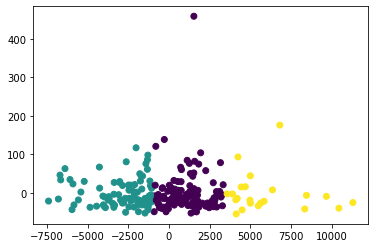

In [398]:
basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(cluster_0)

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(basic_pca_transformed)

cluster_0_tmp = basic_df[basic_df['km_cluster'] == 0].copy()
cluster_0_tmp['km_cluster'] = kmeans.labels_


cluster_0_tmp['pca_x']=basic_pca_transformed[:,0]
cluster_0_tmp['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=cluster_0_tmp.loc[:,'pca_x'], y=cluster_0_tmp.loc[:,'pca_y'],c=cluster_0_tmp['km_cluster'])


In [401]:
cluster_0_tmp[cluster_0_tmp['pca_y']>400]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1153059500,구로구,가리봉동,0.4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1935.0,0.0,0.0,3732,3.78,4.8,11.0,209.0,18.22,8.41,0,1526.559732,458.292141


In [399]:
cluster_0_tmp.groupby('km_cluster').count()

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
1,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
2,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [374]:
cluster_0_tmp[cluster_0_tmp['km_cluster']==0]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1111058000,종로구,교남동,0.35,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,0.000000,12096.000000,0.000000,0.0,2843,13.390000,20.200000,36.000000,10.000000,35.800000,8.020000,0,318.838152,-31.684363
1111065000,종로구,혜화동,1.12,2.000000,1.000000,1.000000,3.000000,0.000000,5.000000,0.000000,2.000000,1.000000,11088.000000,0.000000,0.0,8656,9.940000,42.630000,28.000000,74.000000,43.380000,25.105000,0,-75.483965,4.170872
1111068000,종로구,창신2동,0.26,0.000000,0.333333,0.333333,0.000000,0.000000,1.000000,0.333333,0.000000,0.333333,672.000000,0.000000,0.0,2748,2.686667,5.543333,9.666667,13.666667,20.333333,5.593333,0,2765.166149,-12.903030
1111069000,종로구,창신3동,0.23,0.000000,0.333333,0.333333,0.000000,0.000000,1.000000,0.333333,0.000000,0.333333,672.000000,0.000000,0.0,1928,3.616667,5.543333,9.666667,13.666667,20.333333,5.593333,0,578.562303,-2.906772
1114062500,중구,다산동,0.51,2.166667,0.833333,1.500000,0.000000,0.166667,3.333333,0.333333,0.166667,0.000000,176.666667,0.000000,0.0,4723,3.930000,17.550000,24.166667,54.333333,27.023333,14.410000,0,1456.807121,43.127551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171062000,송파구,가락본동,1.13,3.000000,0.333333,1.666667,0.666667,0.333333,6.666667,6.333333,1.333333,0.333333,699.666667,0.000000,0.0,8611,11.326667,77.360000,63.666667,13.333333,71.560000,17.236667,0,-183.738710,-49.061814
1171063200,송파구,가락2동,0.96,3.000000,0.333333,1.666667,0.666667,0.333333,6.666667,6.333333,1.333333,0.333333,699.666667,0.000000,1.0,9110,9.466667,77.360000,63.666667,13.333333,71.560000,17.236667,0,1685.501957,-49.272130
1174057000,강동구,암사1동,1.02,1.333333,0.666667,1.666667,0.333333,1.333333,5.333333,2.666667,0.333333,0.000000,1442.333333,0.000000,0.0,9760,7.993333,67.523333,13.666667,45.000000,35.533333,16.053333,0,1764.526713,-20.655653


In [364]:
cluster_0_tmp[cluster_0_tmp['km_cluster']==0].describe()

,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000
mean,4.274583,3.951862,0.503504,1.990909,0.750663,0.536048,6.044792,3.390183,1.252999,0.173927,3783.557955,0.648201,0.166667,5764.375000,19.928499,49.642281,30.915972,49.153472,39.968378,21.393447,0.0,-1822.893665,1.008266
std,3.159075,3.968423,0.558545,1.341195,0.873964,0.741436,6.094230,3.953358,2.626954,0.320979,4783.626527,0.814671,0.724446,3149.774248,12.078505,40.860122,40.521317,31.503634,31.879445,18.057916,0.0,667.594236,18.323208
min,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,33.000000,4.550000,2.100000,0.000000,10.333333,1.940000,5.475000,0.0,-3389.557046,-16.596140
25%,2.300000,1.687500,0.000000,1.136364,0.000000,0.000000,3.000000,1.204545,0.250000,0.000000,609.125000,0.000000,0.000000,3865.750000,11.502500,22.950000,10.000000,27.625000,23.836250,12.583750,0.0,-2288.247385,-10.407888
50%,2.830000,3.000000,0.250000,2.000000,0.500000,0.215909,4.000000,2.500000,0.875000,0.000000,2334.750000,0.291667,0.000000,5182.500000,15.427576,34.575000,16.500000,42.312500,37.035455,16.332917,0.0,-1668.392684,-6.039849
75%,6.372500,4.500000,1.000000,2.500000,1.022727,0.616667,6.083333,4.250000,1.375000,0.250000,4637.125000,1.000000,0.000000,7408.500000,27.433864,68.492500,28.072917,59.750000,48.248750,20.077727,0.0,-1382.663517,3.798775
max,12.680000,21.000000,2.000000,6.000000,3.500000,3.000000,27.000000,25.000000,18.000000,1.000000,22554.000000,3.000000,4.000000,13459.000000,53.830000,186.320000,207.000000,139.000000,205.800000,112.150000,0.0,-715.849965,70.435871


In [331]:
cluster_0_tmp[cluster_0_tmp['km_cluster']==1]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1117051000,용산구,후암동,0.86,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1625.000000,0.000000,1.0,5338,10.350000,31.600000,15.000000,26.000000,23.920000,10.540000,1,2781.502864,-5.052488
1117057000,용산구,원효로2동,0.71,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,8125.000000,0.000000,0.0,4038,9.720000,27.900000,11.000000,24.000000,8.700000,11.040000,1,2261.864695,0.537118
1117070000,용산구,보광동,0.71,4.000000,1.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1625.000000,0.000000,0.0,4780,9.360000,14.100000,3.000000,52.000000,25.860000,7.440000,1,3307.053895,36.493306
1120054000,성동구,마장동,1.05,5.000000,0.000000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,1860.000000,0.000000,0.0,7838,21.130000,27.740000,20.000000,92.000000,28.680000,8.950000,1,4039.500849,47.448663
1120058000,성동구,응봉동,0.57,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1860.000000,0.000000,0.0,3896,20.710000,24.940000,4.000000,25.000000,8.580000,3.140000,1,3409.636578,6.512443
1123074000,동대문구,이문1동,1.04,2.000000,0.500000,1.000000,0.000000,0.000000,3.000000,0.500000,1.000000,0.000000,1223.000000,0.000000,0.0,9381,11.500000,35.450000,48.000000,47.500000,32.500000,14.250000,1,5594.812221,-1.450566
1129058000,성북구,돈암1동,0.49,0.666667,0.000000,0.166667,0.000000,0.166667,0.500000,0.833333,0.166667,0.000000,297.166667,0.333333,0.0,3923,10.280000,16.585000,3.833333,8.833333,5.250000,1.431667,1,4580.561920,-23.765427
1129059000,성북구,돈암2동,0.48,0.666667,0.000000,0.166667,0.000000,0.166667,0.500000,0.833333,0.166667,0.000000,297.166667,0.333333,0.0,5782,11.210000,16.585000,3.833333,8.833333,5.250000,1.431667,1,8620.234711,-38.651129
1129060000,성북구,안암동,1.33,3.000000,1.000000,0.000000,1.000000,0.000000,8.000000,0.000000,3.000000,1.000000,8915.000000,0.000000,0.0,8535,13.450000,11.900000,14.000000,56.000000,24.100000,35.480000,1,2991.848313,6.270681


In [328]:
cluster_0_tmp[cluster_0_tmp['km_cluster']==0].describe()

,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000
mean,4.274583,3.951862,0.503504,1.990909,0.750663,0.536048,6.044792,3.390183,1.252999,0.173927,3783.557955,0.648201,0.166667,5764.375000,19.928499,49.642281,30.915972,49.153472,39.968378,21.393447,0.0,-1822.893665,1.008266
std,3.159075,3.968423,0.558545,1.341195,0.873964,0.741436,6.094230,3.953358,2.626954,0.320979,4783.626527,0.814671,0.724446,3149.774248,12.078505,40.860122,40.521317,31.503634,31.879445,18.057916,0.0,667.594236,18.323208
min,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,33.000000,4.550000,2.100000,0.000000,10.333333,1.940000,5.475000,0.0,-3389.557046,-16.596140
25%,2.300000,1.687500,0.000000,1.136364,0.000000,0.000000,3.000000,1.204545,0.250000,0.000000,609.125000,0.000000,0.000000,3865.750000,11.502500,22.950000,10.000000,27.625000,23.836250,12.583750,0.0,-2288.247385,-10.407888
50%,2.830000,3.000000,0.250000,2.000000,0.500000,0.215909,4.000000,2.500000,0.875000,0.000000,2334.750000,0.291667,0.000000,5182.500000,15.427576,34.575000,16.500000,42.312500,37.035455,16.332917,0.0,-1668.392684,-6.039849
75%,6.372500,4.500000,1.000000,2.500000,1.022727,0.616667,6.083333,4.250000,1.375000,0.250000,4637.125000,1.000000,0.000000,7408.500000,27.433864,68.492500,28.072917,59.750000,48.248750,20.077727,0.0,-1382.663517,3.798775
max,12.680000,21.000000,2.000000,6.000000,3.500000,3.000000,27.000000,25.000000,18.000000,1.000000,22554.000000,3.000000,4.000000,13459.000000,53.830000,186.320000,207.000000,139.000000,205.800000,112.150000,0.0,-715.849965,70.435871


In [330]:
cluster_0_tmp[cluster_0_tmp['km_cluster']==1].describe()

,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000
mean,1.191765,3.108021,0.566221,1.323440,0.440642,0.368538,3.937255,1.998396,0.432175,0.075936,2301.497504,0.174421,0.058824,8253.647059,16.702597,34.416186,24.491176,54.332353,28.510661,14.507263,1.0,3759.301324,5.199727
std,0.578794,2.549979,0.469247,0.978215,0.645865,0.677411,3.587703,1.515590,0.837970,0.243700,2631.491689,0.254342,0.242536,3864.011791,7.495216,23.713980,20.338292,43.123233,15.359126,9.413680,0.0,1589.792193,25.185578
min,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,231.090909,0.000000,0.000000,3896.000000,9.360000,11.900000,3.000000,8.833333,5.250000,1.431667,1.0,2261.281414,-38.651129
25%,0.710000,0.750000,0.000000,0.500000,0.000000,0.000000,1.000000,0.833333,0.000000,0.000000,469.000000,0.000000,0.000000,5338.000000,11.210000,17.302500,11.000000,25.000000,21.040000,8.950000,1.0,2781.502864,-5.474795
50%,1.040000,3.000000,0.666667,1.181818,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1625.000000,0.000000,0.000000,7838.000000,16.110000,27.900000,16.000000,43.000000,28.680000,14.024000,1.0,3307.053895,0.684251
75%,1.710000,4.000000,1.000000,2.000000,1.000000,0.181818,5.500000,3.000000,0.363636,0.000000,1860.000000,0.333333,0.000000,9871.000000,20.050000,35.450000,38.250000,76.000000,39.200000,20.033636,1.0,4039.500849,19.026841
max,2.200000,9.000000,1.250000,3.333333,2.250000,2.000000,14.333333,5.333333,3.000000,1.000000,8915.000000,0.750000,1.000000,18066.000000,40.485000,98.356667,70.333333,156.000000,55.480000,35.480000,1.0,8620.234711,54.833058


In [329]:
basic_df.describe()

,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,4.260000e+02,4.260000e+02
mean,1.420728,4.133803,0.622066,2.093897,1.194836,0.518779,7.448357,3.626761,1.302817,0.204225,2452.551643,0.309859,0.178404,6970.138498,15.812629,60.386103,35.896714,54.546948,51.924836,22.293099,1.279343,3.440128e-17,3.765897e-17
std,1.571263,3.156750,0.503566,1.393441,1.606980,0.656479,7.034213,4.318573,2.164240,0.363035,4534.820198,0.457164,0.590994,3195.571959,9.637535,56.739196,25.925220,41.269881,39.557260,17.783109,0.870102,2.218465e+00,1.050761e+00
min,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,33.000000,2.070000,1.000000,0.000000,4.333333,1.940000,1.431667,0.000000,-5.812260e+00,-3.210356e+00
25%,0.670000,2.285714,0.000000,1.350000,0.000000,0.000000,3.500000,1.333333,0.333333,0.000000,442.037500,0.000000,0.000000,4710.250000,9.540000,28.970000,16.750000,26.589286,31.060000,13.440833,0.000000,-1.447795e+00,-5.710449e-01
50%,0.970000,3.500000,0.666667,2.000000,0.833333,0.333333,6.000000,2.500000,0.666667,0.000000,1014.000000,0.142857,0.000000,6607.000000,13.497000,44.300000,30.333333,42.750000,43.096667,17.945000,2.000000,2.731972e-02,-1.173500e-01
75%,1.487500,5.000000,1.000000,2.500000,1.750000,0.729167,9.000000,4.500000,1.333333,0.285714,2163.500000,0.500000,0.000000,8666.500000,19.942500,73.250000,48.187500,67.075000,59.130000,23.131500,2.000000,1.351314e+00,4.816317e-01
max,12.680000,24.000000,3.500000,12.000000,15.000000,4.250000,60.000000,32.500000,18.500000,4.000000,56112.000000,3.000000,4.000000,20429.000000,73.811818,486.355000,207.000000,252.500000,289.700000,135.775000,2.000000,6.850728e+00,6.619203e+00


In [318]:
cluster_0_tmp[cluster_0_tmp['pca_x']>8000]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1129059000,성북구,돈암2동,0.48,0.666667,0.0,0.166667,0.0,0.166667,0.5,0.833333,0.166667,0.0,297.166667,0.333333,0.0,5782,11.21,16.585,3.833333,8.833333,5.25,1.431667,1,8620.234711,-38.651129


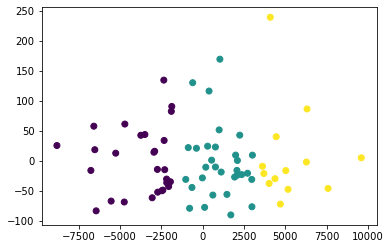

In [319]:
cluster_1_idx = basic_df[basic_df['km_cluster'] == 1].index.values
cluster_1 = density_data.loc[cluster_1_idx]

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(cluster_1)

cluster_1_tmp = basic_df[basic_df['km_cluster'] == 1].copy()
cluster_1_tmp['km_cluster'] = kmeans.labels_

from sklearn.decomposition import PCA

basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(cluster_1)

cluster_1_tmp['pca_x']=basic_pca_transformed[:,0]
cluster_1_tmp['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=cluster_1_tmp.loc[:,'pca_x'], y=cluster_1_tmp.loc[:,'pca_y'],c=cluster_1_tmp['km_cluster'])


In [337]:
cluster_1_tmp[cluster_1_tmp['km_cluster']==0]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1111070000,종로구,숭인1동,0.23,2.000000,1.000000,1.000000,1.500000,0.000000,2.500000,1.000000,0.500000,0.000000,1008.000000,0.500000,1.0,1681,7.630000,8.000000,15.500000,18.500000,16.660000,7.395000,0,-2738.409781,-14.342637
1114055000,중구,명동,0.99,7.000000,1.000000,0.000000,1.000000,0.000000,18.000000,3.000000,18.500000,3.000000,21730.000000,0.500000,3.0,1223,32.320000,19.615000,44.000000,124.500000,177.000000,110.500000,0,-8811.822280,25.453932
1114059000,중구,광희동,0.74,5.500000,0.000000,0.500000,5.000000,1.000000,1.000000,2.000000,3.500000,0.000000,9540.000000,0.000000,4.0,2609,18.210000,3.570000,19.500000,91.000000,48.310000,55.895000,0,-6521.569234,18.490554
1114061500,중구,신당동,0.55,5.166667,0.833333,1.500000,0.000000,0.166667,6.333333,1.333333,2.166667,0.000000,2296.666667,0.000000,1.0,3604,17.950000,17.580000,31.166667,78.333333,45.183333,23.100000,0,-3494.447431,43.778561
1123066000,동대문구,장안2동,1.09,6.500000,1.000000,4.000000,4.500000,1.500000,13.500000,8.000000,0.500000,0.500000,1223.000000,0.000000,0.0,8823,16.640000,109.685000,71.000000,65.500000,88.830000,37.305000,0,-1952.609658,-34.856177
1129068500,성북구,길음2동,0.58,5.666667,0.333333,3.666667,1.000000,1.333333,6.333333,2.666667,1.333333,0.000000,1188.666667,0.000000,0.0,4475,14.086667,86.066667,43.666667,74.333333,56.126667,22.873333,0,-2331.593544,33.886693
1141069000,서대문구,남가좌1동,0.51,5.000000,2.000000,2.500000,2.000000,0.500000,4.000000,0.500000,1.000000,0.500000,1073.500000,0.000000,0.0,3737,8.360000,48.835000,50.500000,17.500000,45.810000,18.910000,0,-2719.523311,-52.212507
1144059000,마포구,용강동,0.84,7.000000,0.666667,3.000000,0.000000,0.000000,10.333333,8.000000,2.333333,0.000000,11574.500000,0.000000,0.0,6001,9.436667,98.000000,52.833333,94.500000,70.610000,25.248333,0,-2903.091785,15.897408
1144066000,마포구,서교동,1.65,24.000000,3.500000,9.500000,15.000000,1.000000,39.500000,4.000000,8.500000,1.000000,8267.500000,0.000000,3.0,12978,43.850000,216.270000,17.500000,127.000000,198.500000,111.575000,0,-2181.835541,-30.412884


In [321]:
cluster_1_tmp[cluster_1_tmp['pca_y']>200]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1153055000,구로구,구로4동,0.46,7.8,1.2,1.4,2.0,0.4,7.8,4.0,1.2,0.2,387.0,0.0,0.0,6501,13.534,38.0,71.2,147.8,61.52,29.254,2,4085.605183,239.0614


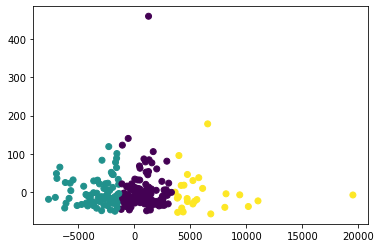

In [322]:
cluster_2_idx = basic_df[basic_df['km_cluster'] == 2].index.values
cluster_2 = density_data.loc[cluster_2_idx]

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(cluster_2)

cluster_2_tmp = basic_df[basic_df['km_cluster'] == 2].copy()
cluster_2_tmp['km_cluster'] = kmeans.labels_

from sklearn.decomposition import PCA

basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(cluster_2)

cluster_2_tmp['pca_x']=basic_pca_transformed[:,0]
cluster_2_tmp['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=cluster_2_tmp.loc[:,'pca_x'], y=cluster_2_tmp.loc[:,'pca_y'],c=cluster_2_tmp['km_cluster'])


In [324]:
cluster_2_tmp[cluster_2_tmp['pca_y']>200]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1153059500,구로구,가리봉동,0.4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1935.0,0.0,0.0,3732,3.78,4.8,11.0,209.0,18.22,8.41,0,1267.284218,459.70287


In [326]:
cluster_2_tmp[cluster_2_tmp['pca_x']>15000]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1162069500,관악구,신림동,0.54,3.636364,0.909091,1.181818,1.090909,0.181818,6.0,1.272727,0.363636,0.090909,231.090909,0.181818,0.0,14890,73.811818,28.97,20.0,43.0,37.050909,20.033636,2,19510.743271,-7.835866
